In [689]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [690]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [691]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [693]:
df.country_long

0      India
1      India
2      India
3      India
4      India
       ...  
902    India
903    India
904    India
905    India
906    India
Name: country_long, Length: 907, dtype: object

India    907
Name: country_long, dtype: int64


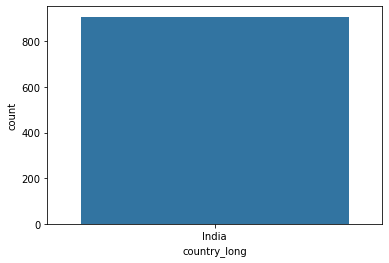

In [694]:
import seaborn as sns #checking for null
country_long=sns.countplot(x="country_long", data=df)
print(df["country_long"].value_counts())

In [695]:
#We can remove the column country & country_long as all 907 values are India . We shall also be removing gppd_idnr as it does
#not impact fuel type or capacity
#We also remove other_fuel2 & other_fuel3 as all values are null
#Source, url, and geo location sprce can also be elminated as they are not required features for predicting fuel type or cpacoty

In [696]:
# dropping these  columns as they are not relevant to predict primary fuel or capacity
df = df.drop(['country','country_long', 'gppd_idnr', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 'wepp_id', 'geolocation_source'], axis=1)

In [697]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [698]:
df.columns


Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


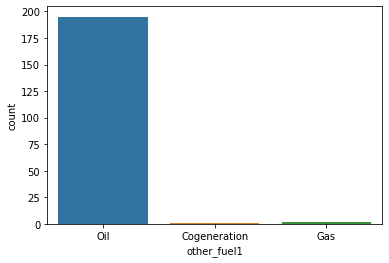

In [699]:
import seaborn as sns #checking for null
other_fuel1=sns.countplot(x="other_fuel1", data=df)
print(df["other_fuel1"].value_counts())

In [700]:
df=df.fillna({"other_fuel1":df["other_fuel1"].mode()[0]})

In [701]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [702]:
df.generation_gwh_2013 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2013, Length: 907, dtype: float64

In [703]:
df.generation_gwh_2019 #checking for null

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2019, Length: 907, dtype: float64

2019.0    519
Name: year_of_capacity_data, dtype: int64


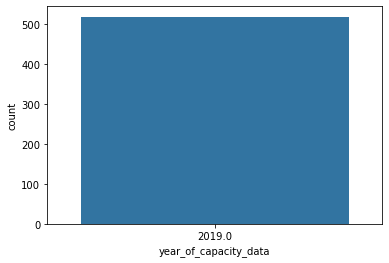

In [704]:
import seaborn as sns #checking for null
commissioning_year=sns.countplot(x="year_of_capacity_data", data=df)
print(df["year_of_capacity_data"].value_counts())

In [705]:
df.estimated_generation_gwh

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: estimated_generation_gwh, Length: 907, dtype: float64

In [706]:
#droppin estimated_generation_gwh, generation_gwh_2019, generation_gwh_2013. generation_data_source as null
df = df.drop(['estimated_generation_gwh','generation_gwh_2019', 'generation_gwh_2013', 'generation_data_source'], axis=1)

In [707]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


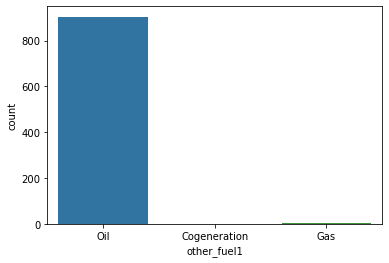

In [708]:
import seaborn as sns #checking for null
Otherfuel1=sns.countplot(x="other_fuel1", data=df1)
print(df["other_fuel1"].value_counts())

In [709]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


2019.0    519
Name: year_of_capacity_data, dtype: int64


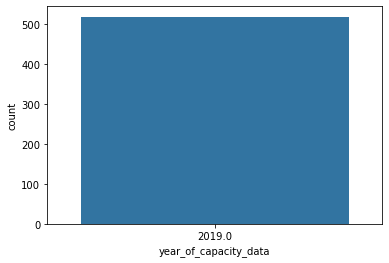

In [710]:
import seaborn as sns #checking for null
year_of_capacity_data=sns.countplot(x="year_of_capacity_data", data=df1)
print(df["year_of_capacity_data"].value_counts())

In [711]:
# dropping these  columns as they are null - generation_gwh_2019  and generation_gwh_2013
df = df.drop(['year_of_capacity_data'], axis=1)

In [712]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,NaN,NaN,NaN,NaN,NaN,NaN


In [713]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [714]:
#adding zero to numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             861 non-null    float64
 3   longitude            861 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [715]:
df=df.fillna(0)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   latitude             907 non-null    float64
 3   longitude            907 non-null    float64
 4   primary_fuel         907 non-null    object 
 5   other_fuel1          907 non-null    object 
 6   commissioning_year   907 non-null    float64
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [717]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,20.122831,73.536147,1160.382580,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,7.655960,17.674358,985.973139,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.172050,73.811550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,2003.000000,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


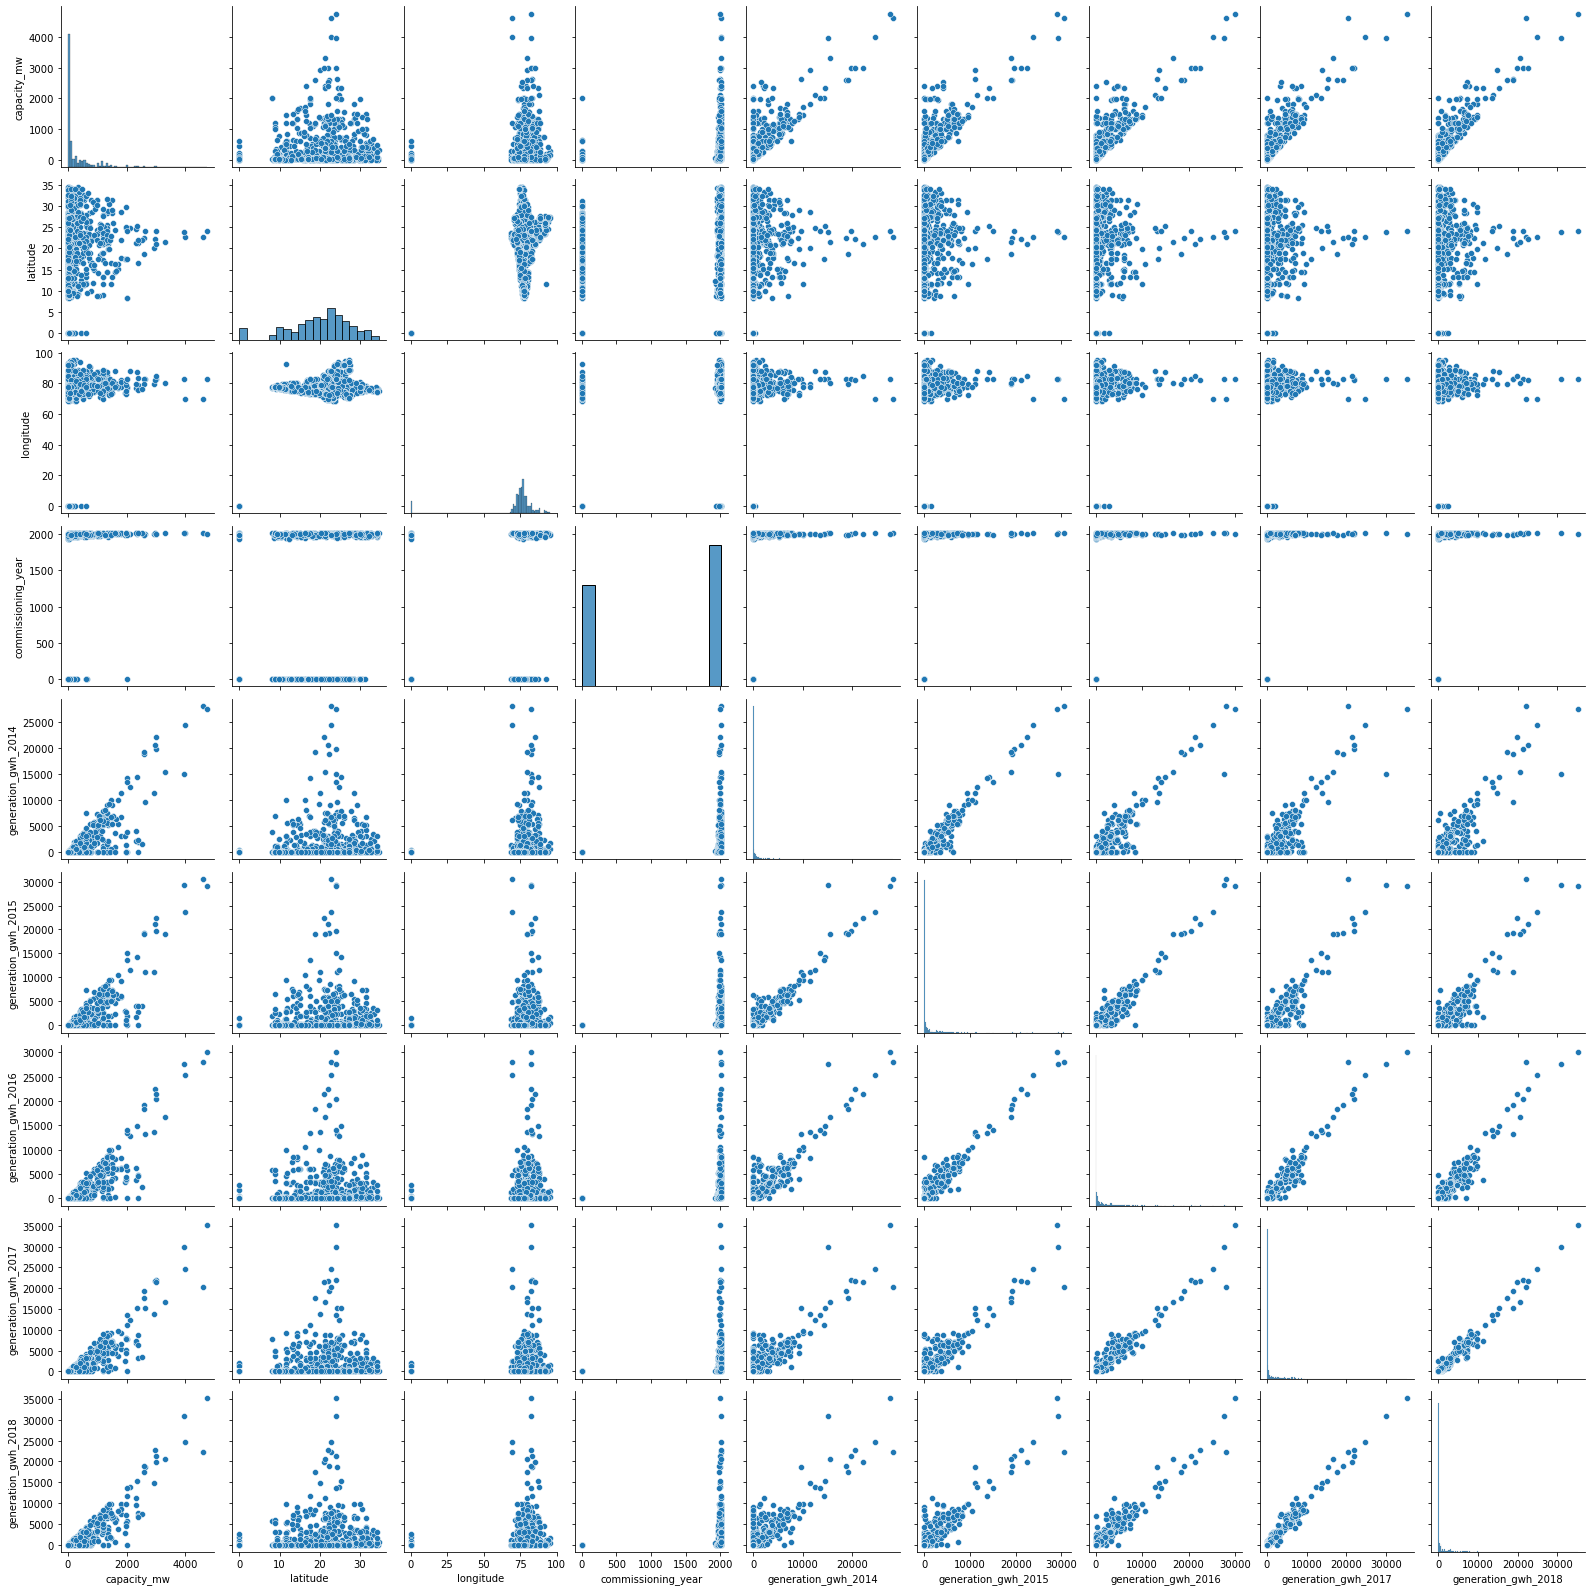

In [718]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot2.png')
plt.show()

In [719]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [720]:
#separating categorical data
df_visualization_Categorical_Data=df[["name", "primary_fuel", "other_fuel1"]].copy()

In [721]:
df_visualization_Categorical_Data.tail()

,name,primary_fuel,other_fuel1
902,YERMARUS TPP,Coal,Oil
903,Yelesandra Solar Power Plant,Solar,Oil
904,Yelisirur wind power project,Wind,Oil
905,ZAWAR MINES,Coal,Oil
906,iEnergy Theni Wind Farm,Wind,Oil


In [722]:
#separating continous data data
df_visualization_Continous_Data=df[["capacity_mw", "latitude", "longitude", "commissioning_year", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018"]].copy()

In [723]:
df_visualization_Continous_Data

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


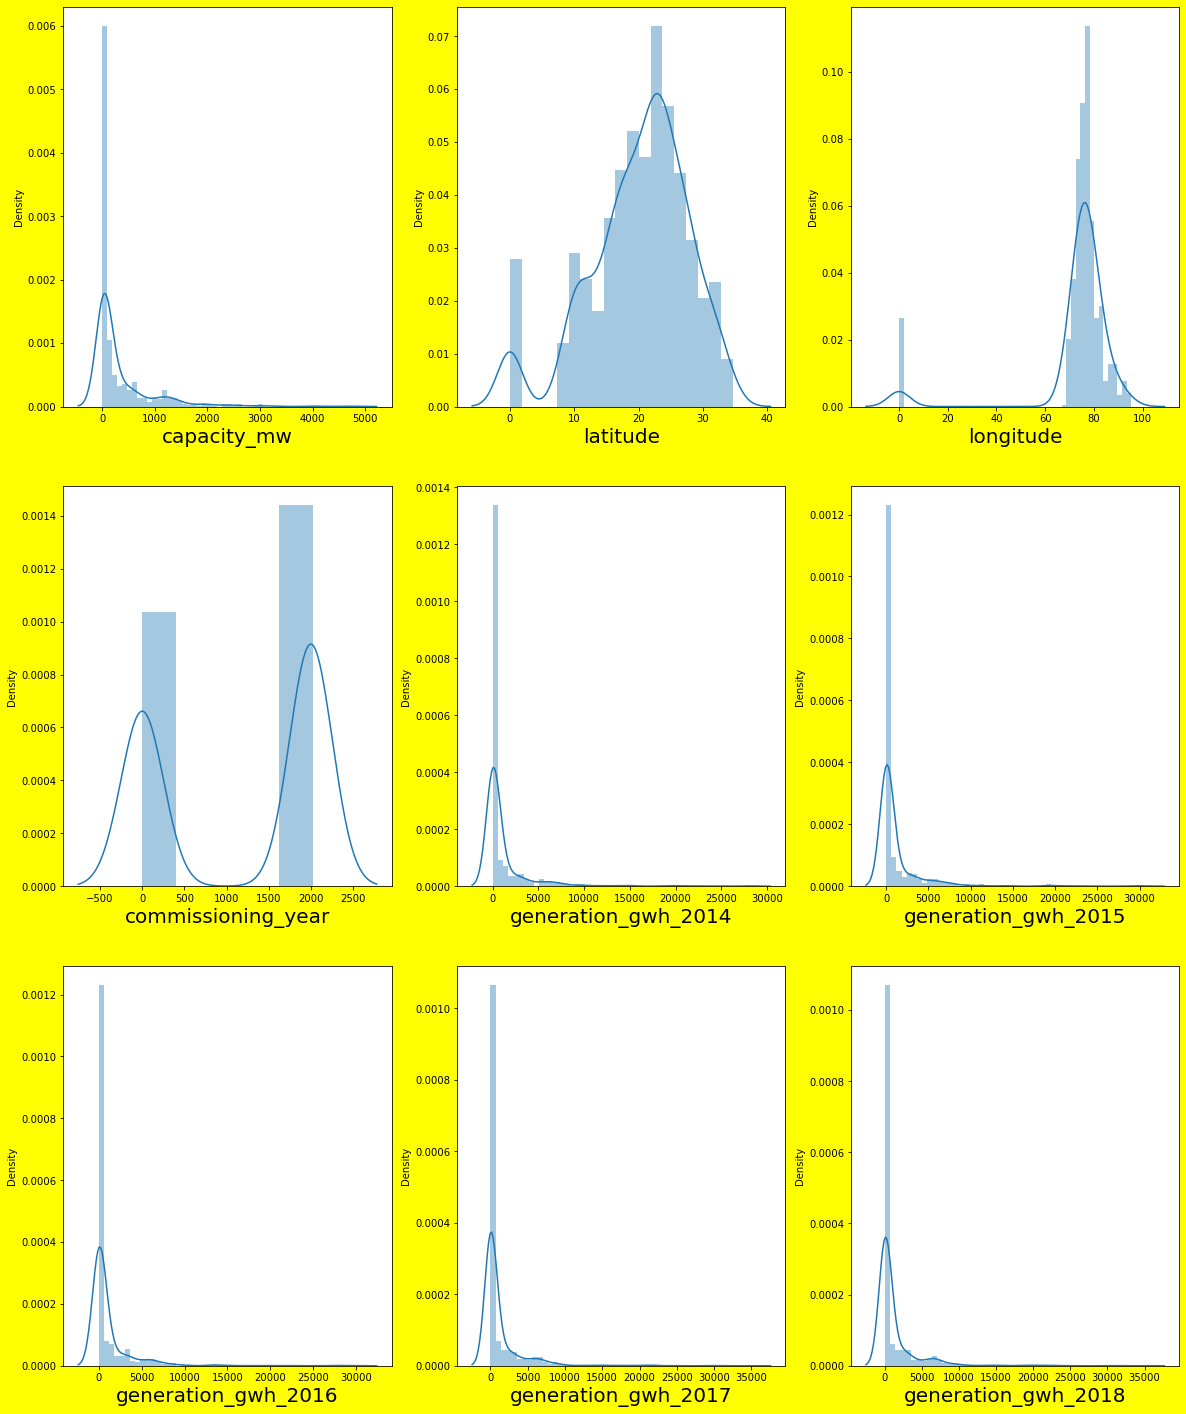

In [724]:
#EDA for continous data
#Let's see how data is distributed for every column
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber=1
for column in df_visualization_Continous_Data:
    if plotnumber <= 10: #column is 10 in number
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df_visualization_Continous_Data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+= 1
plt.show()


In [725]:
df = df.drop(['name'], axis=1)

In [726]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [727]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,0.000000,0.000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,2,0.0,0.000000,0.000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,2,0.0,0.000000,0.000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2,2004.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


<AxesSubplot:>

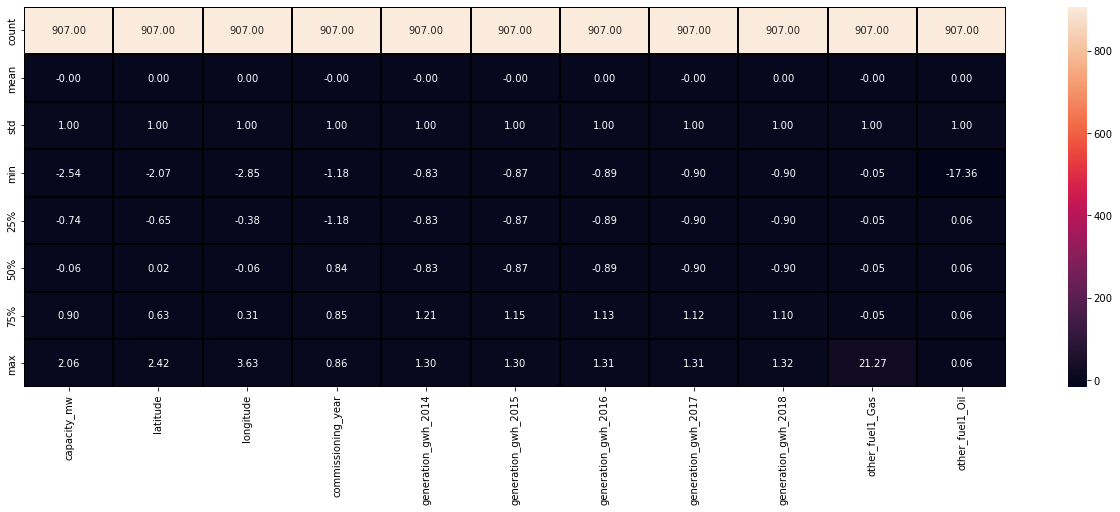

In [728]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(x.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [729]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.103618,0.153272,-0.380395,0.003105,0.414667,0.815794,0.842964,0.876811,0.894259,0.906774
latitude,0.103618,1.000000,0.592760,-0.085174,0.021508,0.045036,0.100765,0.096393,0.089594,0.102933,0.099208
longitude,0.153272,0.592760,1.000000,-0.216738,-0.003824,0.072341,0.118932,0.121014,0.124467,0.130957,0.131175
primary_fuel,-0.380395,-0.085174,-0.216738,1.000000,0.004912,-0.481665,-0.285822,-0.291273,-0.304119,-0.313935,-0.315301
other_fuel1,0.003105,0.021508,-0.003824,0.004912,1.000000,-0.045620,-0.003019,0.001950,0.006688,0.007852,0.011101
commissioning_year,0.414667,0.045036,0.072341,-0.481665,-0.045620,1.000000,0.311099,0.310897,0.322731,0.331997,0.333507
generation_gwh_2014,0.815794,0.100765,0.118932,-0.285822,-0.003019,0.311099,1.000000,0.966869,0.938079,0.907753,0.898900
generation_gwh_2015,0.842964,0.096393,0.121014,-0.291273,0.001950,0.310897,0.966869,1.000000,0.974772,0.944057,0.936856
generation_gwh_2016,0.876811,0.089594,0.124467,-0.304119,0.006688,0.322731,0.938079,0.974772,1.000000,0.976470,0.967814
generation_gwh_2017,0.894259,0.102933,0.130957,-0.313935,0.007852,0.331997,0.907753,0.944057,0.976470,1.000000,0.988117


In [730]:
df.isnull().sum().sum()

0

<AxesSubplot:>

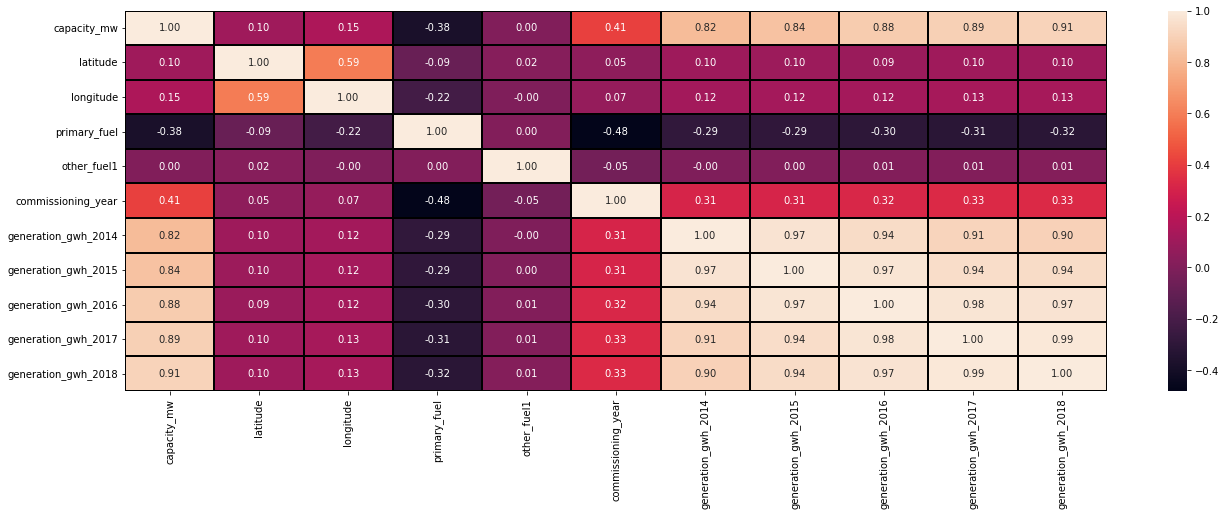

In [731]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [732]:
df.skew().sort_values(ascending=False)

generation_gwh_2015     5.260778
generation_gwh_2014     4.986588
generation_gwh_2016     4.984874
generation_gwh_2017     4.979870
generation_gwh_2018     4.846091
capacity_mw             3.123576
primary_fuel            0.472251
commissioning_year     -0.328505
latitude               -0.730074
longitude              -3.581827
other_fuel1           -20.453120
dtype: float64

<AxesSubplot:xlabel='generation_gwh_2014'>

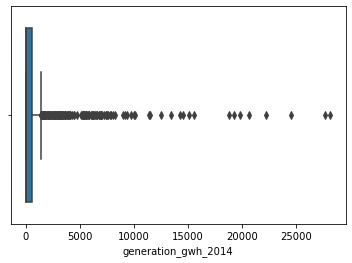

In [733]:
sns.boxplot(df["generation_gwh_2014"])

<AxesSubplot:xlabel='longitude'>

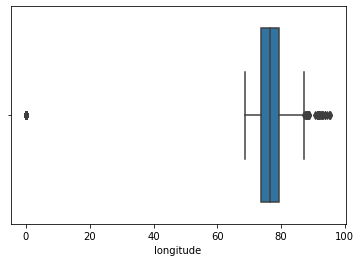

In [734]:
sns.boxplot(df["longitude"])

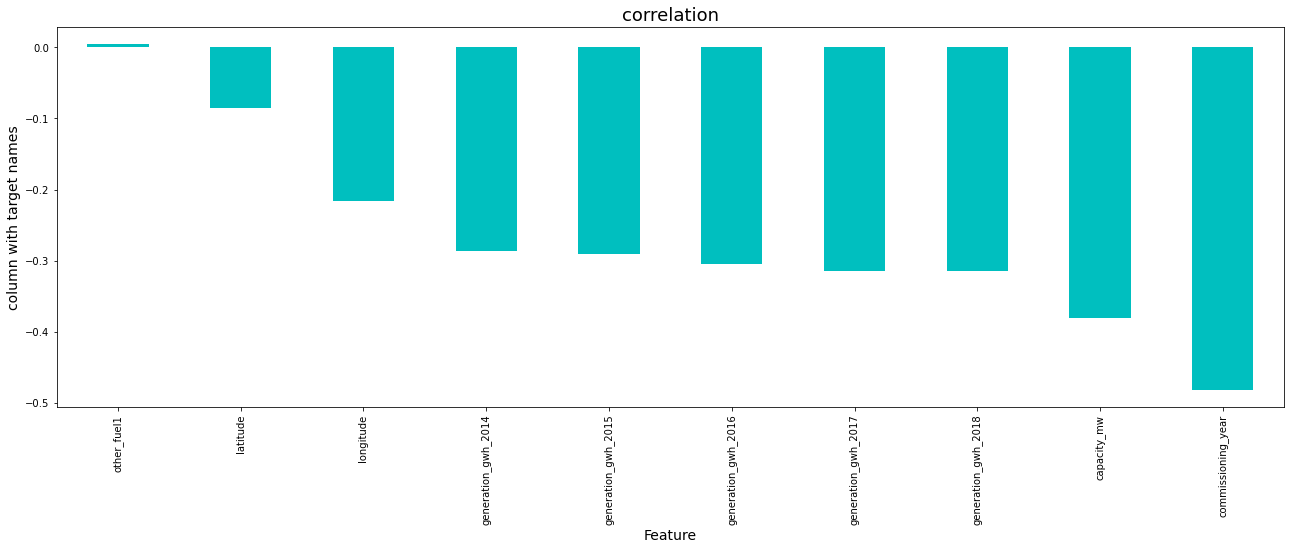

In [735]:
#REALATION WITH PRIMARY FUEL
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(["primary_fuel"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

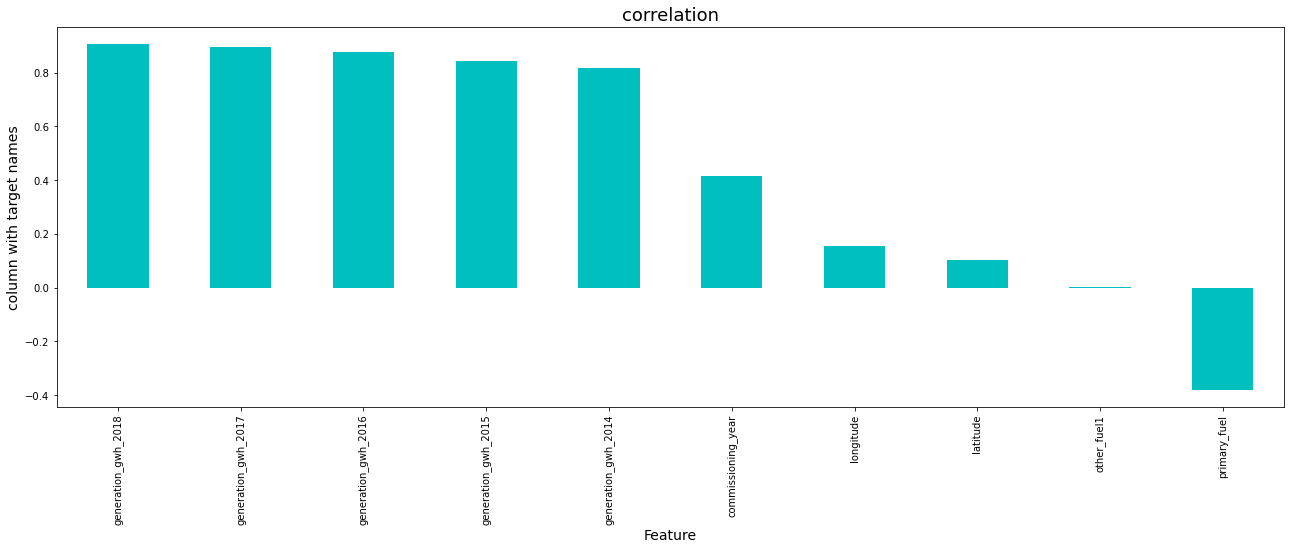

In [736]:
#RELATION WITH CAPACITY
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(["capacity_mw"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [737]:
#RELATION WITH PRIMARY FUEL
corr_matrix=df.corr()
corr_matrix["primary_fuel"].sort_values(ascending=False)

primary_fuel           1.000000
other_fuel1            0.004912
latitude              -0.085174
longitude             -0.216738
generation_gwh_2014   -0.285822
generation_gwh_2015   -0.291273
generation_gwh_2016   -0.304119
generation_gwh_2017   -0.313935
generation_gwh_2018   -0.315301
capacity_mw           -0.380395
commissioning_year    -0.481665
Name: primary_fuel, dtype: float64

In [738]:
#RELATION WITH CAPACITYL
corr_matrix=df.corr()
corr_matrix["capacity_mw"].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.906774
generation_gwh_2017    0.894259
generation_gwh_2016    0.876811
generation_gwh_2015    0.842964
generation_gwh_2014    0.815794
commissioning_year     0.414667
longitude              0.153272
latitude               0.103618
other_fuel1            0.003105
primary_fuel          -0.380395
Name: capacity_mw, dtype: float64

In [769]:
# Partioning the data for primary fuel
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [770]:
from sklearn.preprocessing import power_transform
X_new=power_transform(x)

In [771]:
X_new

array([[-1.69576688,  1.11516688, -0.32639283, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.19369368,  0.60022859, -0.17538691, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [-0.2923371 ,  0.18431095, -0.72975023, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       ...,
       [-0.52277344, -0.71738276, -0.06542599, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.08691496,  0.53883892, -0.27095206, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [-0.75589054, -1.36868349,  0.15548378, ..., -0.8729758 ,
        -0.87813097, -0.88378789]])

In [772]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

generation_gwh_2014     0.460708
generation_gwh_2015     0.385627
generation_gwh_2016     0.345864
generation_gwh_2017     0.334327
generation_gwh_2018     0.317200
capacity_mw             0.022164
latitude               -0.323518
commissioning_year     -0.329010
longitude              -1.532802
other_fuel1           -17.330022
dtype: float64

In [773]:
x=pd.DataFrame(X_new, columns=x.columns)

In [774]:
pd.DataFrame(X_new, columns=x.columns).skew().sort_values(ascending=False)

generation_gwh_2014     0.460708
generation_gwh_2015     0.385627
generation_gwh_2016     0.345864
generation_gwh_2017     0.334327
generation_gwh_2018     0.317200
capacity_mw             0.022164
latitude               -0.323518
commissioning_year     -0.329010
longitude              -1.532802
other_fuel1           -17.330022
dtype: float64

In [775]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X_new)
Scaled_X

array([[-1.69576688,  1.11516688, -0.32639283, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.19369368,  0.60022859, -0.17538691, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [-0.2923371 ,  0.18431095, -0.72975023, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       ...,
       [-0.52277344, -0.71738276, -0.06542599, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.08691496,  0.53883892, -0.27095206, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [-0.75589054, -1.36868349,  0.15548378, ..., -0.8729758 ,
        -0.87813097, -0.88378789]])

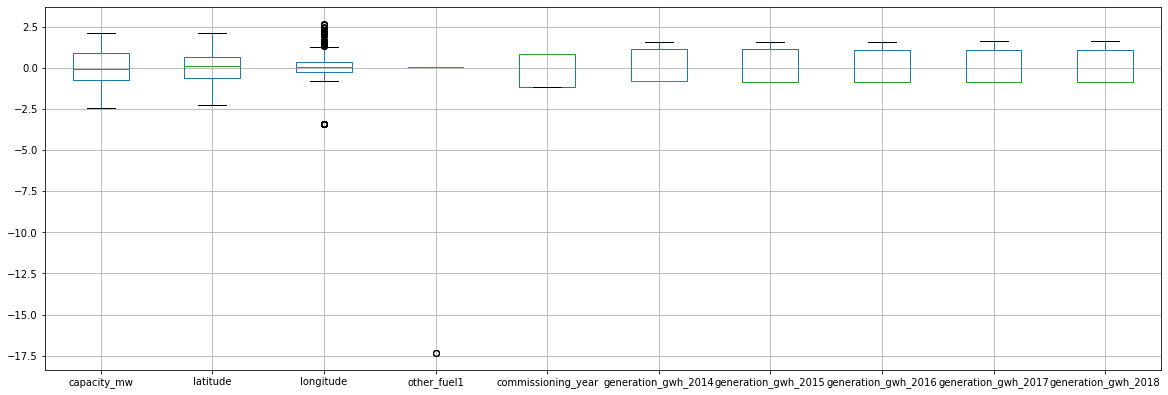

In [776]:
#Plotting boxplots for first 30 columns
x.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [777]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
from sklearn.metrics import classification_report

In [778]:
#Splitting the dataframe for logistic regression:
for i in range(0,400):
    x_train,x_test,y_train,y_test=train_test_split(Scaled_X,y,random_state=i,test_size=0.25)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state state",i,"The model performs very well")
        print("At random_state state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random_state state 11 The model performs very well
At random_state state:- 11
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 93 The model performs very well
At random_state state:- 93
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 192 The model performs very well
At random_state state:- 192
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 304 The model performs very well
At random_state state:- 304
Training accuracy_score is:- 67.4
Testing accuracy_score is:- 67.4 


At random_state state 339 The model performs very well
At random_state state:- 339
Training accuracy_score is:- 66.5
Testing accuracy_score is:- 66.5 




In [781]:
x_train, x_test, y_train, y_test  = train_test_split(Scaled_X,y, test_size=0.25, random_state=11)

In [782]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.26      0.28      0.27        64
           2       0.17      0.06      0.09        17
           3       0.35      0.36      0.35        75
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.12      0.10      0.11        29
           7       0.09      0.17      0.12        23

    accuracy                           0.23       227
   macro avg       0.12      0.12      0.12       227
weighted avg       0.23      0.23      0.23       227



In [787]:
x_train,x_test,y_train,y_test=train_test_split(Scaled_X,y,test_size=0.25, random_state=11)

In [608]:
!pip install classifier


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [788]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [789]:
def print_score(clf, x_train, x_test,y_train, y_test, train=True): #clf is classifier algorithm
    if train: 
        y_pred2=clf.predict(x_train)
        print("\n================Train Result========")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred2)*100:.2f}%")
    elif train==False: #if tain false, it means it is test
              pred=clf.predict(x_test)
              print("\n‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒")
              print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
              print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [790]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 69.71%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 69.16%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.77      0.75      0.76        64
           2       0.50      0.12      0.19        17
           3       0.78      0.92      0.84        75
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.74      0.59      0.65        29
           7       0.44      0.91      0.59        23

    accuracy                           0.69       227
   macro avg       0.40      0.41      0.38       227
weighted avg       0.65      0.69      0.65       227



In [791]:
from sklearn.ensemble import GradientBoostingClassifier 
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)


#Call the function and pass dataset to check train and test score
print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 99.85%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 79.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.79      0.83      0.81        64
           2       0.62      0.47      0.53        17
           3       0.88      0.96      0.92        75
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.81      0.72      0.76        29
           7       0.72      0.78      0.75        23

    accuracy                           0.79       227
   macro avg       0.67      0.58      0.59       227
weighted avg       0.79      0.79      0.78       227



In [792]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [793]:
xgb.fit(x_train, y_train) 
y_pred3=xgb.predict(x_test)

In [794]:
r2_score(y_test,y_pred3)

0.5525400410256833

In [795]:
from sklearn.ensemble import RandomForestClassifier #same code as above only randon forest used
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)


# Call the function and pass dataset to check train and test score
print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 81.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.82      0.86      0.84        64
           2       0.64      0.41      0.50        17
           3       0.84      0.95      0.89        75
           4       0.00      0.00      0.00         3
           5       1.00      0.20      0.33         5
           6       0.92      0.76      0.83        29
           7       0.77      0.87      0.82        23

    accuracy                           0.81       227
   macro avg       0.71      0.61      0.62       227
weighted avg       0.81      0.81      0.80       227



In [796]:
rf.fit(x_train, y_train) 
y_pred5=rf.predict(x_test)

In [797]:
r2_score(y_test,y_pred5)


0.5709272686564594

In [798]:
pred=rf.predict(x_test)

In [763]:
#THUS RANDOM CLASIFIR and GRADIENT BOOSTING GIVES THE BEST RESULT

In [764]:
#USING HYPER TUNING TO INCREASE ACCURACY

In [766]:
gbdt.get_params().keys() 

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [767]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'learning_rate': np.arange(0.1,0.3) #it can go upto 1
}

In [768]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [799]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 2}

In [811]:
import pandas as pd
gbdt_clf=GradientBoostingClassifier(max_depth=6, min_samples_split=2, learning_rate=0.1)
gbdt_clf.fit(x_train, y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report=pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)} \n")

#***********************Test score******************************************
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")



================Train Result======================
Accuracy Score: 100.00%
____________________________________________________
CLASSIFICATION REPORT:
              0      1     2      3    4     5     6      7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
support    39.0  194.0  52.0  176.0  6.0  15.0  98.0  100.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        680.0         680.0  
____________________________________________________
Confusion Matrix: 
 [[ 39   0   0   0   0   0   0   0]
 [  0 194   0   0   0   0   0   0]
 [  0   0  52   0   0   0   0   0]
 [  0   0   0 176   0   0   0   0]
 [  0   0   0   0   6   0   0   0]
 [  0   0   0   0   0  15   0   0]
 [  0   0   0 

In [ ]:
#HYPERTUNING FOR RANDOM FOREST

In [812]:
rf.get_params().keys() 

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [828]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'max_depth':range(4,8),
    'min_samples_split': range(2,8,2),
'n_estimators': range(3, 6) #it can go upto 1
}

In [848]:
RFgrid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs = -1)

In [859]:
import pandas as pd
rf_clf=RandomForestClassifier(max_depth=6, min_samples_split=4, n_estimators=55)
rf_clf.fit(x_train, y_train)
rfpred=rf_clf.predict(x_train)
rf_clf_report=pd.DataFrame(classification_report(y_train, rfpred, output_dict=True))
print("\n================Train Result======================")
print (f"Accuracy Score: {accuracy_score(y_train, rfpred)*100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("____________________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, rfpred)} \n")

#***********************Test score******************************************
rfpred=rf_clf.predict(x_test)
rf_report = pd.DataFrame(classification_report(y_test, rfpred, output_dict=True))
print("\n=================Test Result ==========================")
print (f"Accuracy Score: {accuracy_score(y_test, rfpred)* 100:.2f}%")
print("____________________________________________________")
print (f"CLASSIFICATION REPORT: \n{clf_report}")
print("____________________________________________________")
print (f"Confusion Matrix: \n {confusion_matrix(y_test, rfpred)}\n")


================Train Result======================
Accuracy Score: 84.71%
____________________________________________________
CLASSIFICATION REPORT:
              0      1     2      3    4     5     6      7  accuracy  \
precision   1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
recall      1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
f1-score    1.0    1.0   1.0    1.0  1.0   1.0   1.0    1.0       1.0   
support    39.0  194.0  52.0  176.0  6.0  15.0  98.0  100.0       1.0   

           macro avg  weighted avg  
precision        1.0           1.0  
recall           1.0           1.0  
f1-score         1.0           1.0  
support        680.0         680.0  
____________________________________________________
Confusion Matrix: 
 [[ 30   4   0   0   0   0   1   4]
 [  2 170   0  11   0   0   1  10]
 [  0   8  25  13   0   0   0   6]
 [  0   5   0 171   0   0   0   0]
 [  0   4   0   1   0   0   0   1]
 [  0   1   0   6   0   2   0   6]
 [  1   3   0  

In [621]:
#LET US PREDICT the capacity

In [650]:
# dividing feature and Label data
X = df.drop(columns=['capacity_mw'], axis = 1)
y= df['capacity_mw']

In [651]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [652]:
from sklearn.model_selection import train_test_split
LR=LinearRegression()

In [653]:
from sklearn.metrics import r2_score
for i in range(0,200):
    x_train, x_test, y_train, y_test=train_test_split(Scaled_X,y,test_size=0.25,random_state=99)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.52326273659607
At random state 0,the testing accuracy is:- 0.5451540840294768


At random state 1,the training accuracy is:- 0.52326273659607
At random state 1,the testing accuracy is:- 0.5451540840294768


At random state 2,the training accuracy is:- 0.52326273659607
At random state 2,the testing accuracy is:- 0.5451540840294768


At random state 3,the training accuracy is:- 0.52326273659607
At random state 3,the testing accuracy is:- 0.5451540840294768


At random state 4,the training accuracy is:- 0.52326273659607
At random state 4,the testing accuracy is:- 0.5451540840294768


At random state 5,the training accuracy is:- 0.52326273659607
At random state 5,the testing accuracy is:- 0.5451540840294768


At random state 6,the training accuracy is:- 0.52326273659607
At random state 6,the testing accuracy is:- 0.5451540840294768


At random state 7,the training accuracy is:- 0.52326273659607
At random state 7,the testing accuracy is:- 0.545

At random state 82,the training accuracy is:- 0.52326273659607
At random state 82,the testing accuracy is:- 0.5451540840294768


At random state 83,the training accuracy is:- 0.52326273659607
At random state 83,the testing accuracy is:- 0.5451540840294768


At random state 84,the training accuracy is:- 0.52326273659607
At random state 84,the testing accuracy is:- 0.5451540840294768


At random state 85,the training accuracy is:- 0.52326273659607
At random state 85,the testing accuracy is:- 0.5451540840294768


At random state 86,the training accuracy is:- 0.52326273659607
At random state 86,the testing accuracy is:- 0.5451540840294768


At random state 87,the training accuracy is:- 0.52326273659607
At random state 87,the testing accuracy is:- 0.5451540840294768


At random state 88,the training accuracy is:- 0.52326273659607
At random state 88,the testing accuracy is:- 0.5451540840294768


At random state 89,the training accuracy is:- 0.52326273659607
At random state 89,the testing acc

At random state 148,the training accuracy is:- 0.52326273659607
At random state 148,the testing accuracy is:- 0.5451540840294768


At random state 149,the training accuracy is:- 0.52326273659607
At random state 149,the testing accuracy is:- 0.5451540840294768


At random state 150,the training accuracy is:- 0.52326273659607
At random state 150,the testing accuracy is:- 0.5451540840294768


At random state 151,the training accuracy is:- 0.52326273659607
At random state 151,the testing accuracy is:- 0.5451540840294768


At random state 152,the training accuracy is:- 0.52326273659607
At random state 152,the testing accuracy is:- 0.5451540840294768


At random state 153,the training accuracy is:- 0.52326273659607
At random state 153,the testing accuracy is:- 0.5451540840294768


At random state 154,the training accuracy is:- 0.52326273659607
At random state 154,the testing accuracy is:- 0.5451540840294768


At random state 155,the training accuracy is:- 0.52326273659607
At random state 155

In [654]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

In [655]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 271.0289607950797
MSE: 124957.6589035443
RMSE: 353.49350616884647


In [656]:
LR.score(x_train , y_train)

0.52326273659607

In [657]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [658]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 3.764497797356829
MSE: 133.78989286784144
RMSE: 11.566758096711517


In [659]:
dt.score(x_train , y_train)

1.0

In [660]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [661]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 3.793886475770926
MSE: 305.0793632126816
RMSE: 17.466521210953303


In [662]:
rfr.score(x_train , y_train)

0.9990335233953263

In [663]:
#xgb
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)
predX=xgb.predict(x_test)

In [664]:
print('MAE:', metrics.mean_absolute_error(y_test, predX))
print('MSE:', metrics.mean_squared_error(y_test, predX))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predX)))

MAE: 4.962031602229317
MSE: 357.14954964905326
RMSE: 18.89840071670228


In [665]:
xgb.score(x_train , y_train)

0.9999999034019185

In [666]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [667]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 45.08006930930164
MSE: 3237.6130791559085
RMSE: 56.90002705760261


In [668]:
ada.score(x_train , y_train)

0.9923113072983684

In [669]:
from sklearn.model_selection import RandomizedSearchCV

In [670]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [671]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [672]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [673]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.1)

In [675]:
ada=AdaBoostRegressor(learning_rate=0.3,n_estimators=60)
ada.fit(x_train,y_train) #this is our score
predA= ada.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,predA))

*****accuracy post tuning*****
0.9913211848196805


,Y Test,Pred
63,250.0,225.607279
126,150.0,75.875744
219,15.0,54.331679
266,27.3,54.331679
547,60.0,54.331679


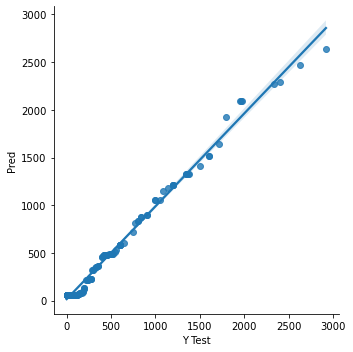

In [676]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predA},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()